In [1]:
import torch
import numpy as np
import time
import matplotlib.pyplot as plt
from smplpytorch.pytorch.smpl_layer import SMPL_Layer
from display_utils import display_model
import pickle
import joblib
import os

/home/lala/miniconda3/envs/smpltojoint/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pkl_file = '/home/lala/Downloads/wham_output 2.pkl'
smpl_data = joblib.load(pkl_file)
print(smpl_data[0].keys())
loaded_data = smpl_data[0]

dict_keys(['pose', 'trans', 'pose_world', 'trans_world', 'betas', 'verts', 'frame_ids'])


Saving figure at image.png.


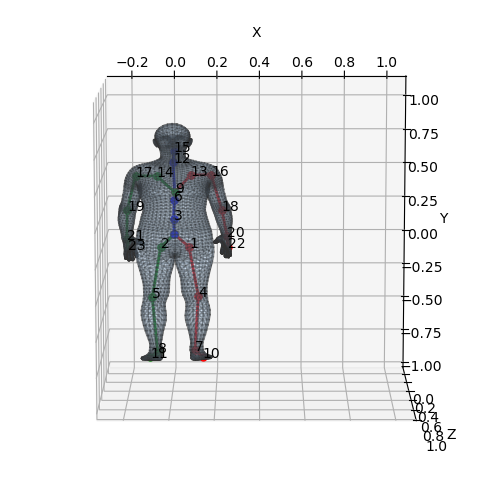

<Axes3DSubplot:xlabel='X', ylabel='Y'>

In [ ]:
######For a single frame testing
pose_params = torch.tensor(loaded_data["pose"][:1], dtype=torch.float32)  # First frame
shape_params = torch.tensor(loaded_data["betas"][:1], dtype=torch.float32)  # First frame

cuda = torch.cuda.is_available()
if cuda:
    pose_params = pose_params.cuda()
    shape_params = shape_params.cuda()

smpl_layer = SMPL_Layer(
    center_idx=0,
    gender='neutral',
    model_root='smplpytorch/native/models'
)

if cuda:
    smpl_layer.cuda()

verts, Jtr = smpl_layer(pose_params, th_betas=shape_params)

verts[:, :, 1] *= -1  # Invert Y-axis
Jtr[:, :, 1] *= -1  # Invert Y-axis for joints

display_model(
    {'verts': verts.cpu().detach(),
     'joints': Jtr.cpu().detach()},
    model_faces=smpl_layer.th_faces,
    with_joints=True,
    kintree_table=smpl_layer.kintree_table,
    savepath='image.png',
    show=True
)

Saving figure at image.png.


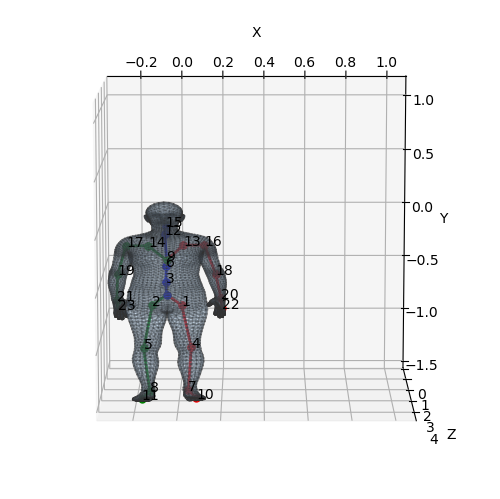

<Axes3DSubplot:xlabel='X', ylabel='Y'>

In [31]:
######For a single frame testing -- with translation
pose_params = torch.tensor(loaded_data["pose"][:1], dtype=torch.float32)   # (1, 72)
shape_params = torch.tensor(loaded_data["betas"][:1], dtype=torch.float32) # (1, 10)
trans_params = torch.tensor(loaded_data["trans"][:1], dtype=torch.float32) # (1, 3)

cuda = torch.cuda.is_available()
if cuda:
    pose_params = pose_params.cuda()
    shape_params = shape_params.cuda()

smpl_layer = SMPL_Layer(
    center_idx=0,
    gender='neutral',
    model_root='smplpytorch/native/models'
)

if cuda:
    smpl_layer.cuda()

verts, Jtr = smpl_layer(pose_params, th_betas=shape_params)
verts = verts + trans_params[:, None, :] 
Jtr = Jtr + trans_params[:, None, :]
verts[:, :, 1] *= -1
Jtr[:, :, 1] *= -1

display_model(
    {'verts': verts.cpu(),
     'joints': Jtr.cpu()},
    model_faces=smpl_layer.th_faces,
    with_joints=True,
    kintree_table=smpl_layer.kintree_table,
    savepath='image.png',
    show=True)

Pose shape: (42, 72)
Betas shape: (42, 10)


/home/lala/Documents/GitHub/smpl_to_joint/smplpytorch/pytorch/smpl_layer.py:41: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /croot/pytorch_1675190298929/work/torch/csrc/utils/tensor_numpy.cpp:172.)
  torch.Tensor(smpl_data['betas'].r).unsqueeze(0))


Saving figure at frames/frame_0000.png.
Saved: frames/frame_0000.png
Saving figure at frames/frame_0001.png.
Saved: frames/frame_0001.png
Saving figure at frames/frame_0002.png.
Saved: frames/frame_0002.png
Saving figure at frames/frame_0003.png.
Saved: frames/frame_0003.png
Saving figure at frames/frame_0004.png.
Saved: frames/frame_0004.png
Saving figure at frames/frame_0005.png.
Saved: frames/frame_0005.png
Saving figure at frames/frame_0006.png.
Saved: frames/frame_0006.png
Saving figure at frames/frame_0007.png.
Saved: frames/frame_0007.png
Saving figure at frames/frame_0008.png.
Saved: frames/frame_0008.png
Saving figure at frames/frame_0009.png.
Saved: frames/frame_0009.png
Saving figure at frames/frame_0010.png.
Saved: frames/frame_0010.png
Saving figure at frames/frame_0011.png.
Saved: frames/frame_0011.png
Saving figure at frames/frame_0012.png.
Saved: frames/frame_0012.png
Saving figure at frames/frame_0013.png.
Saved: frames/frame_0013.png
Saving figure at frames/frame_0014

/home/lala/Documents/GitHub/smpl_to_joint/display_utils.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


Saved: frames/frame_0020.png
Saving figure at frames/frame_0021.png.
Saved: frames/frame_0021.png
Saving figure at frames/frame_0022.png.
Saved: frames/frame_0022.png
Saving figure at frames/frame_0023.png.
Saved: frames/frame_0023.png
Saving figure at frames/frame_0024.png.
Saved: frames/frame_0024.png
Saving figure at frames/frame_0025.png.
Saved: frames/frame_0025.png
Saving figure at frames/frame_0026.png.
Saved: frames/frame_0026.png
Saving figure at frames/frame_0027.png.
Saved: frames/frame_0027.png
Saving figure at frames/frame_0028.png.
Saved: frames/frame_0028.png
Saving figure at frames/frame_0029.png.
Saved: frames/frame_0029.png
Saving figure at frames/frame_0030.png.
Saved: frames/frame_0030.png
Saving figure at frames/frame_0031.png.
Saved: frames/frame_0031.png
Saving figure at frames/frame_0032.png.
Saved: frames/frame_0032.png
Saving figure at frames/frame_0033.png.
Saved: frames/frame_0033.png
Saving figure at frames/frame_0034.png.
Saved: frames/frame_0034.png
Savin

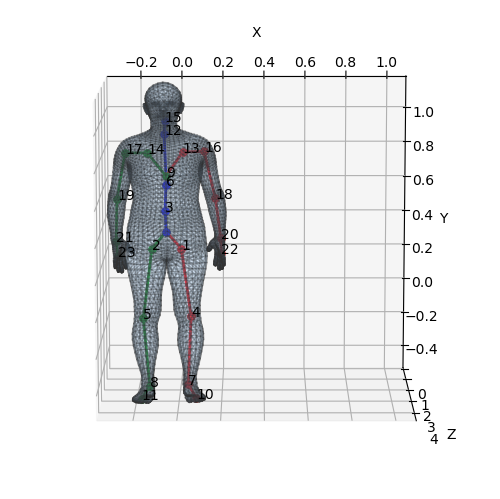

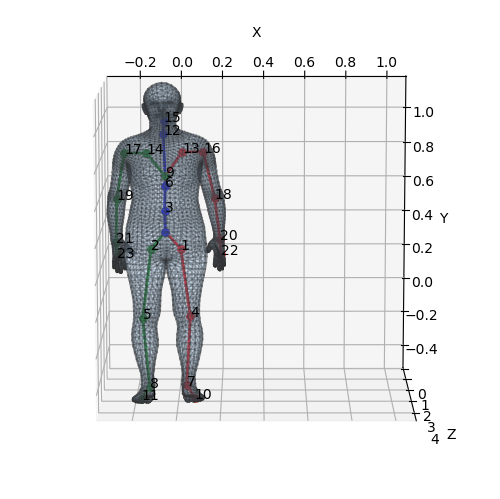

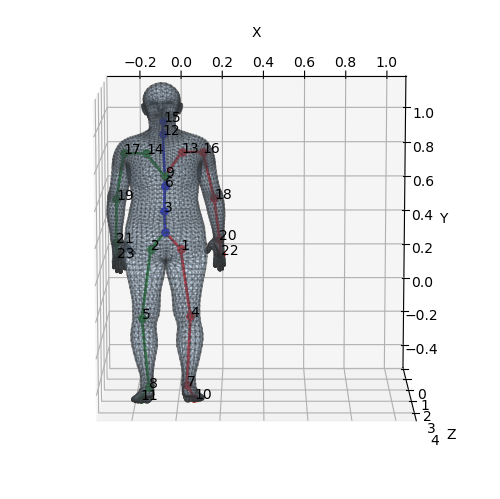

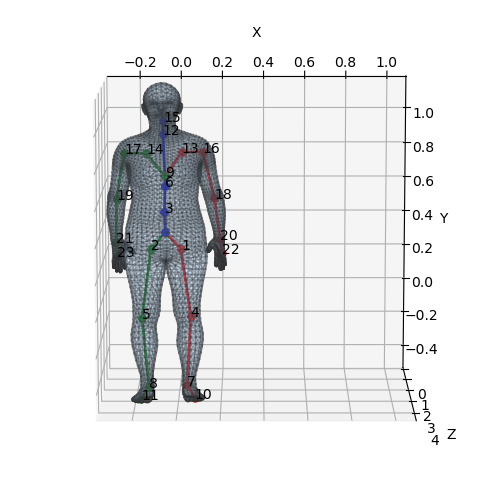

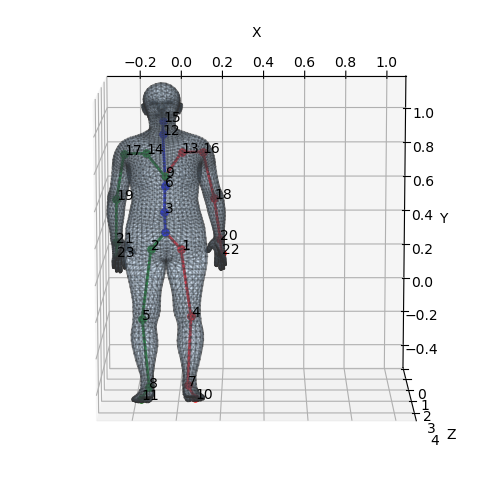

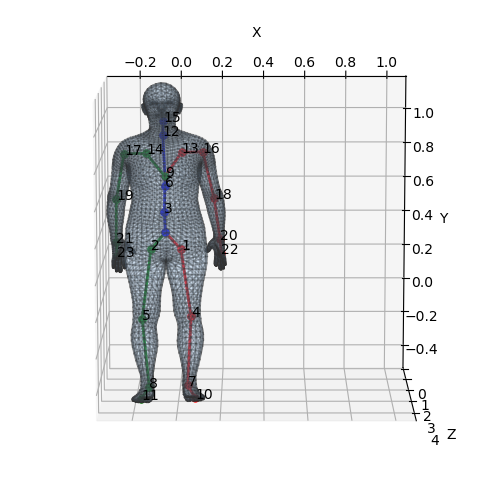

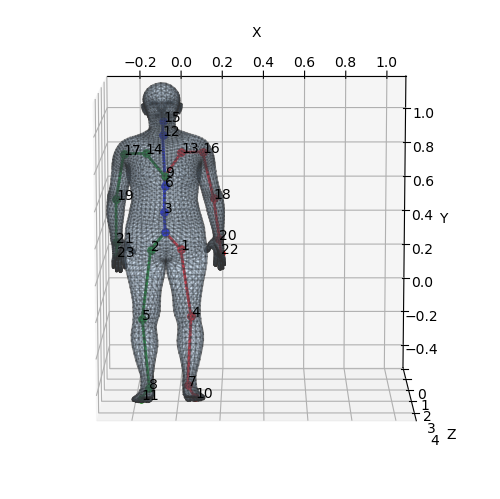

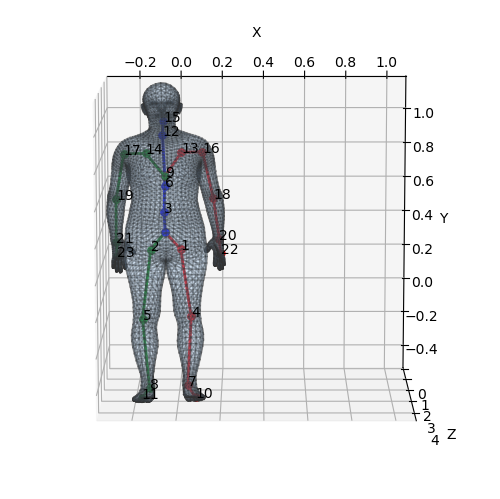

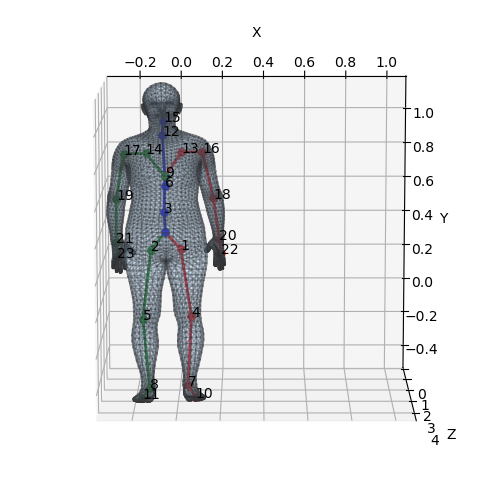

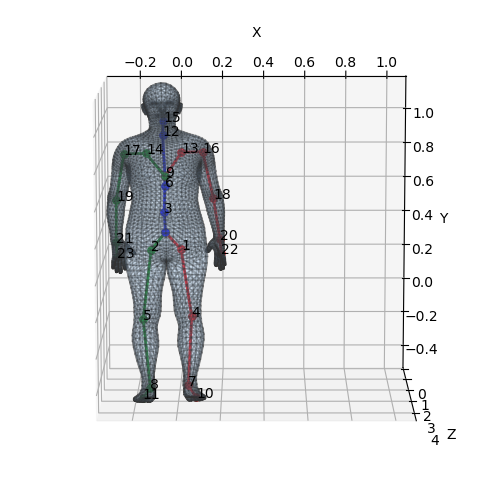

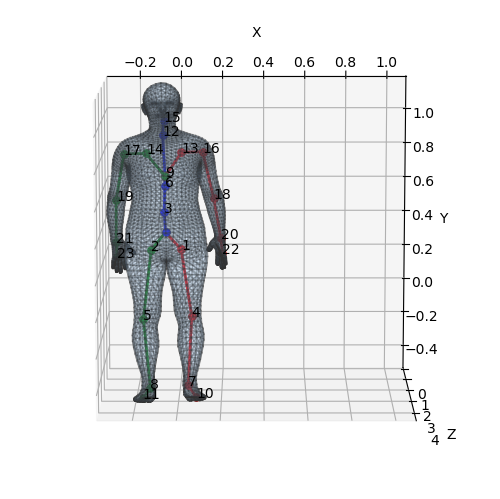

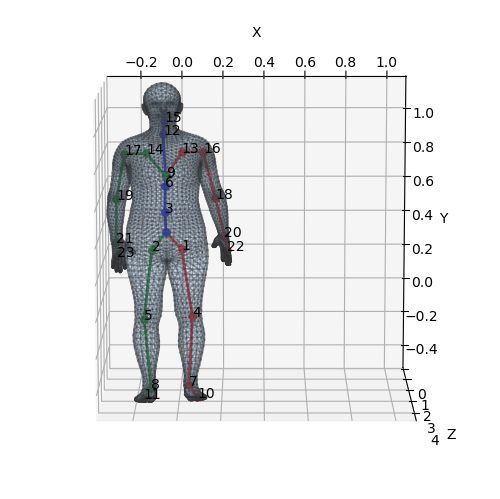

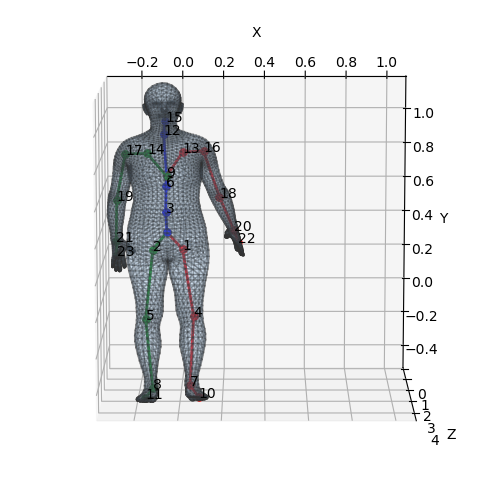

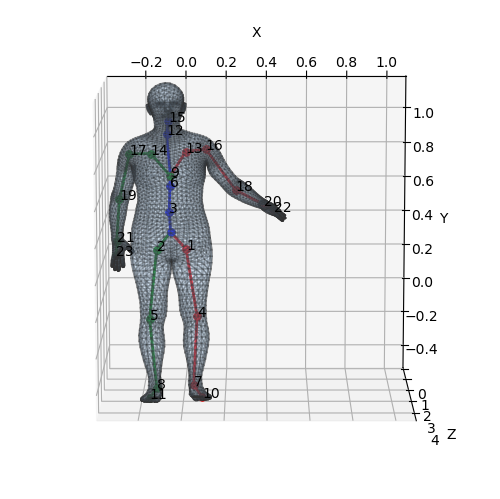

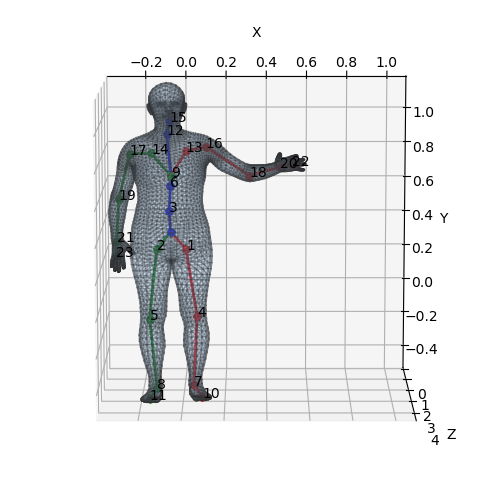

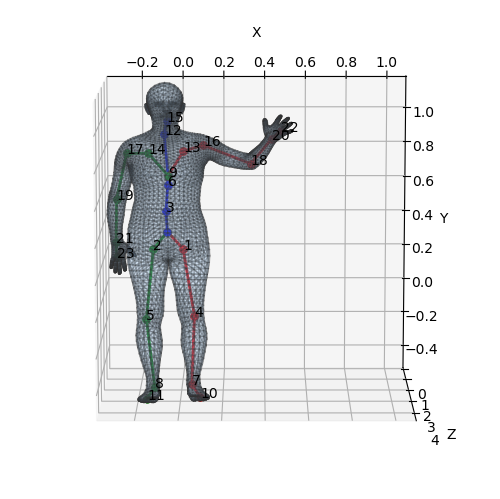

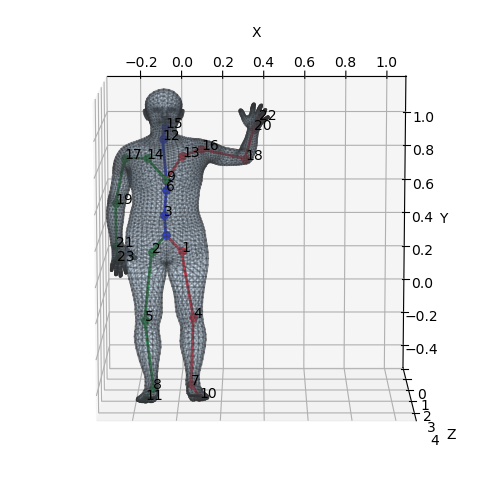

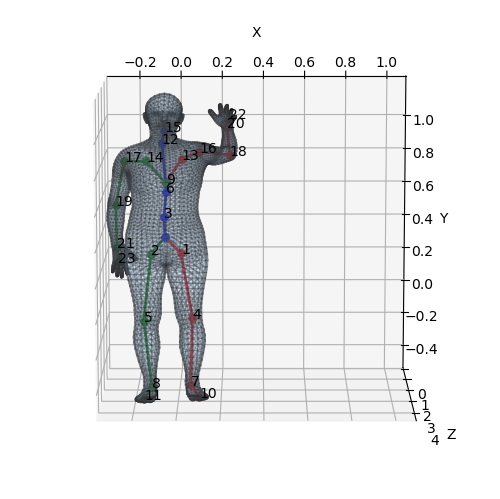

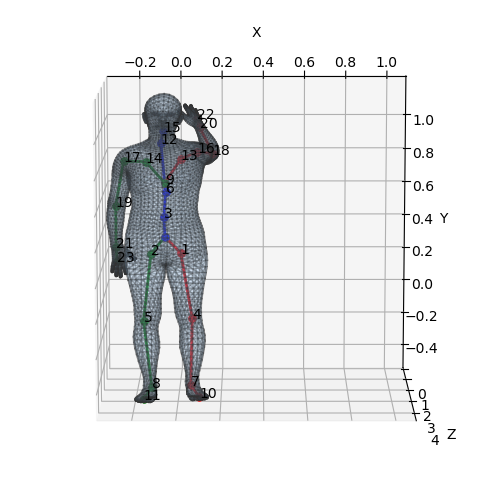

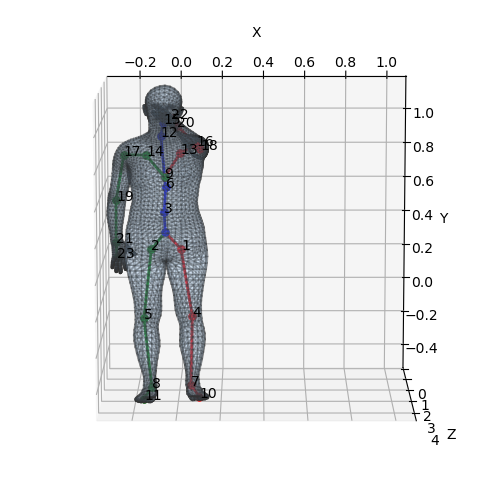

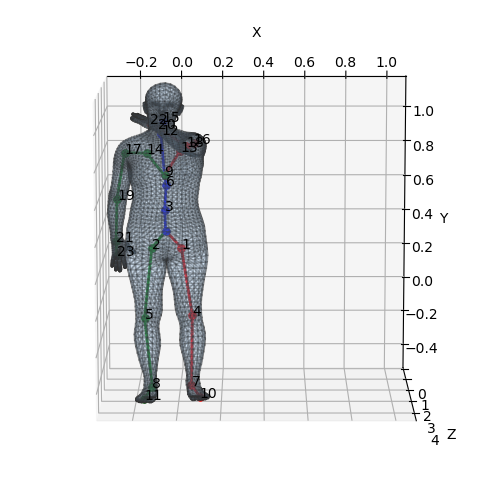

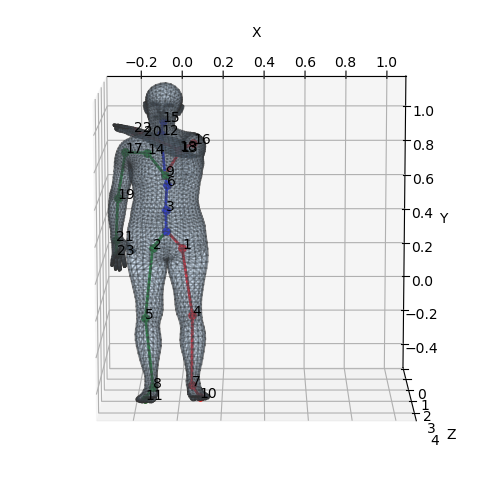

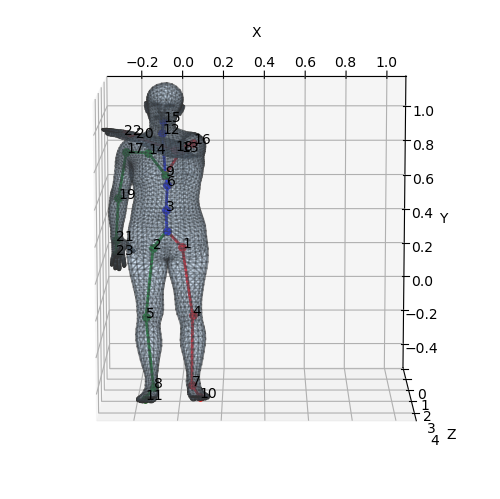

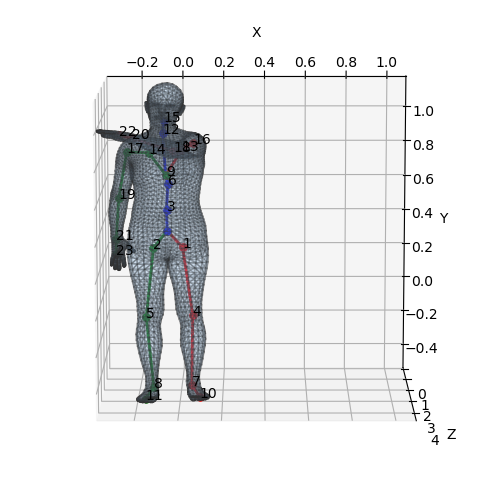

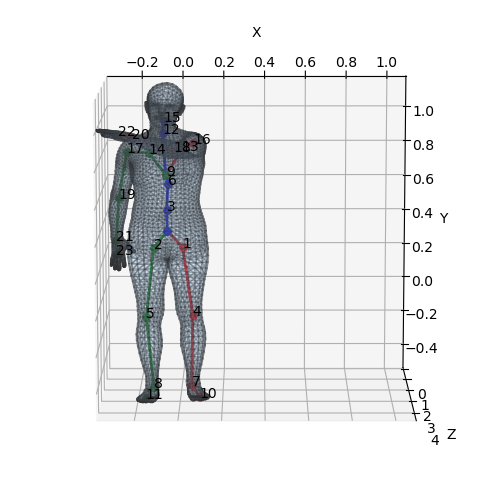

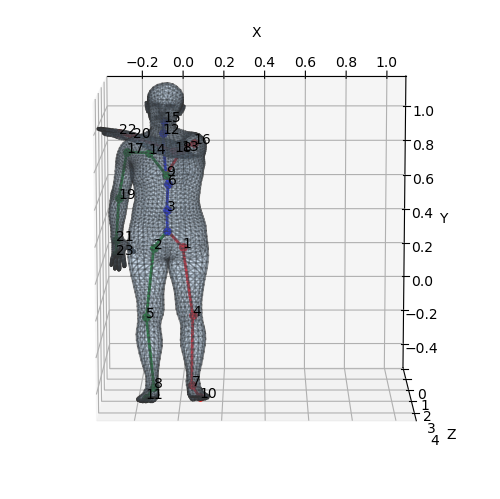

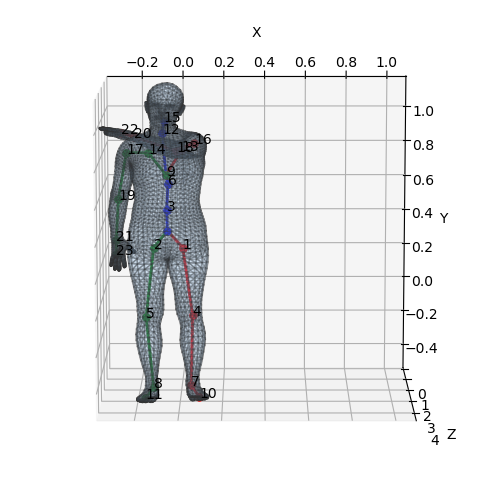

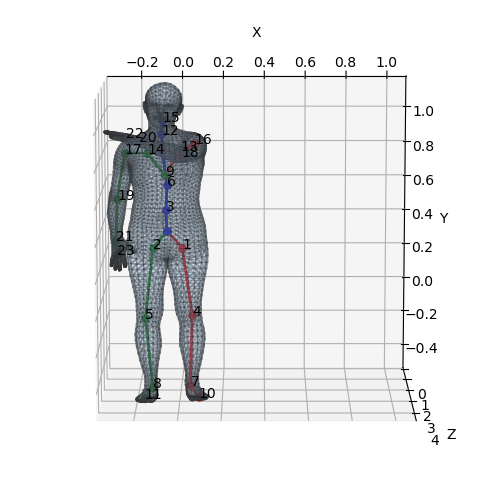

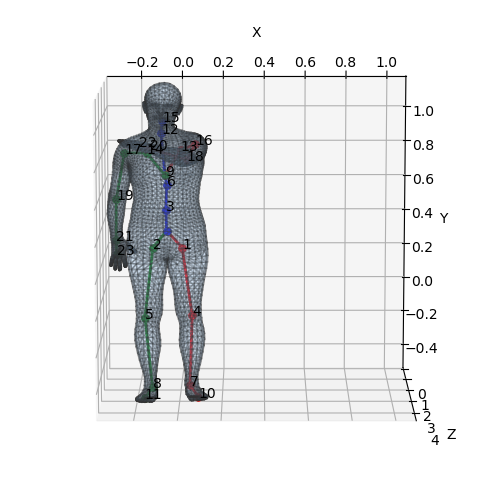

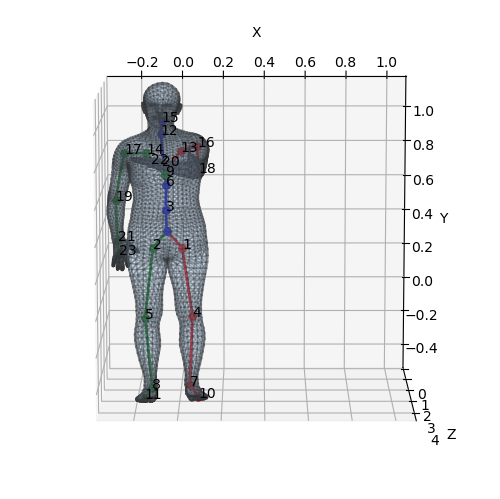

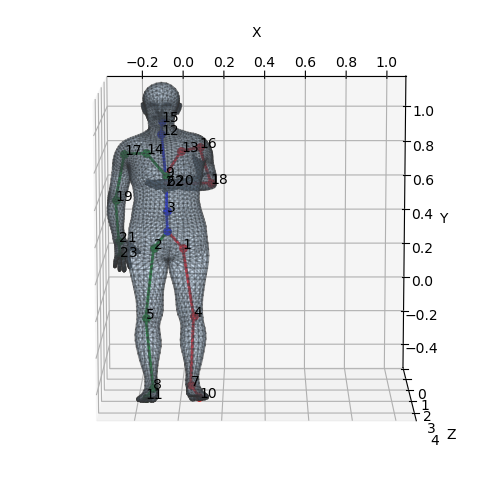

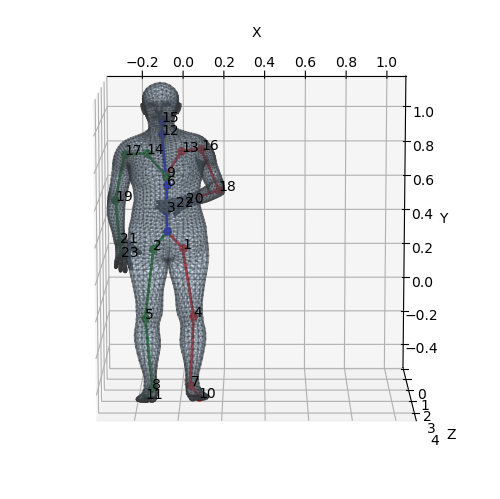

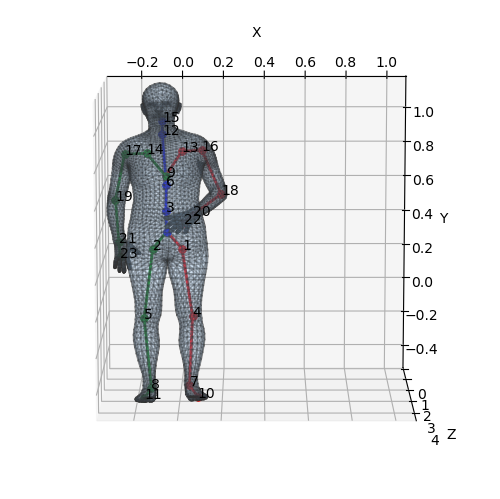

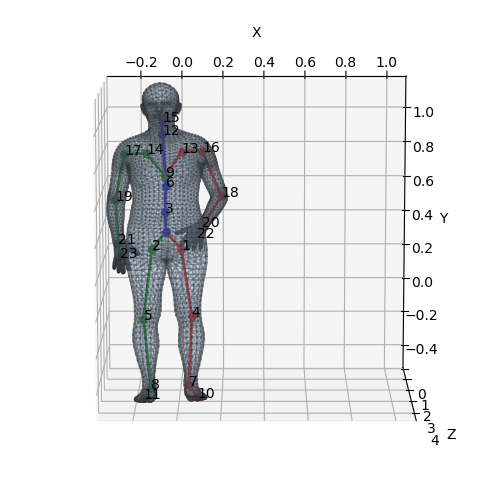

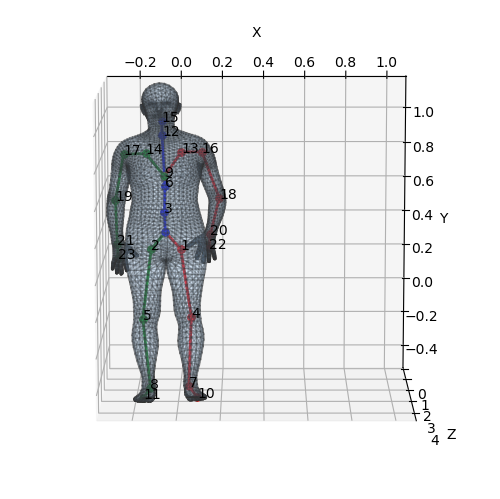

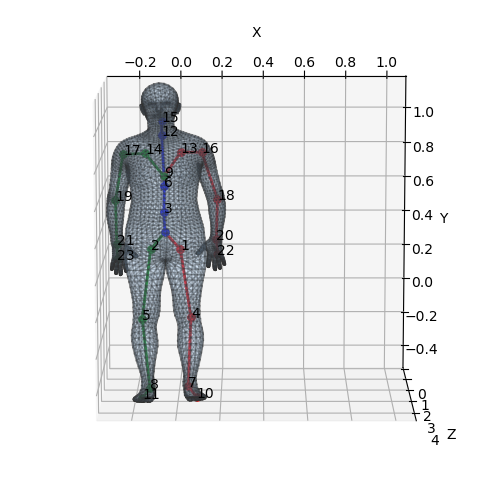

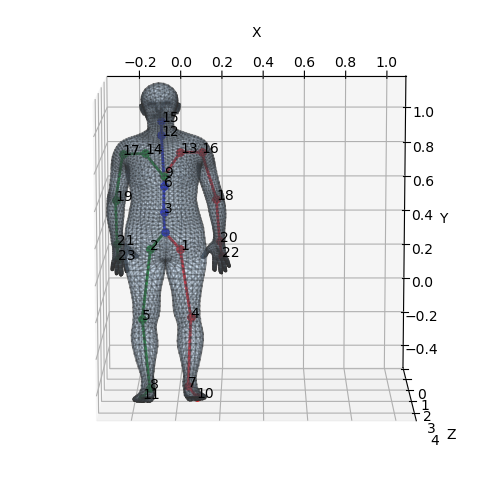

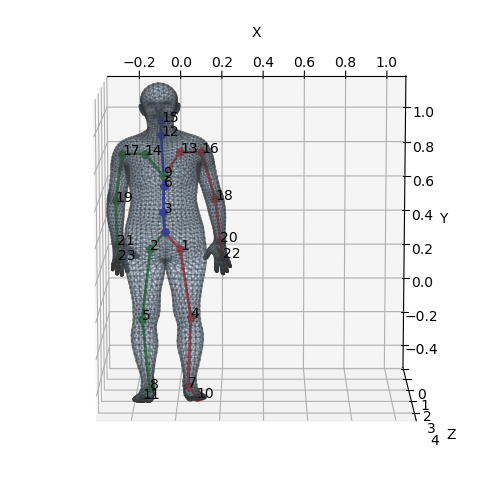

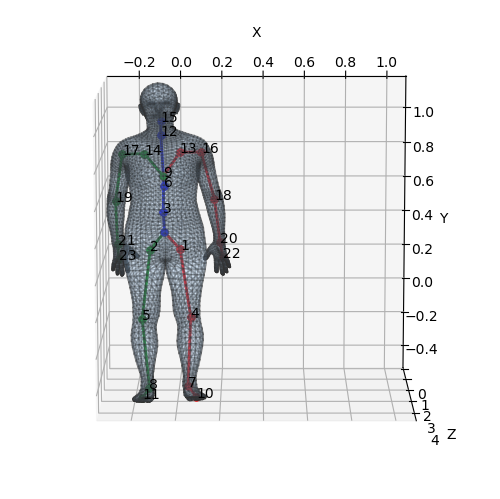

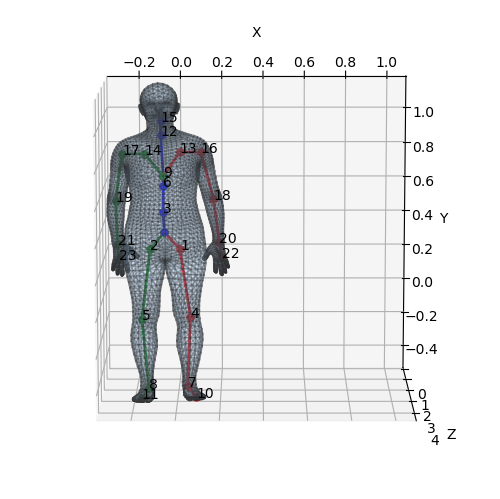

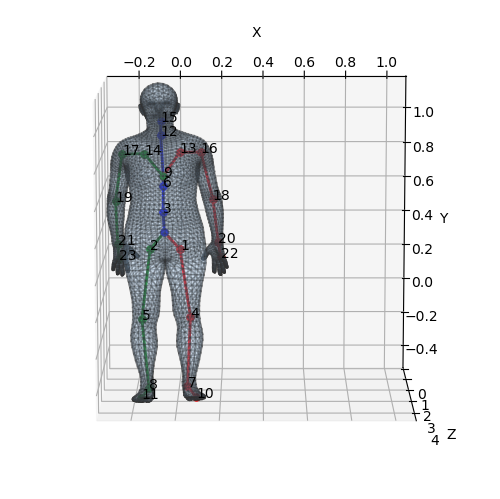

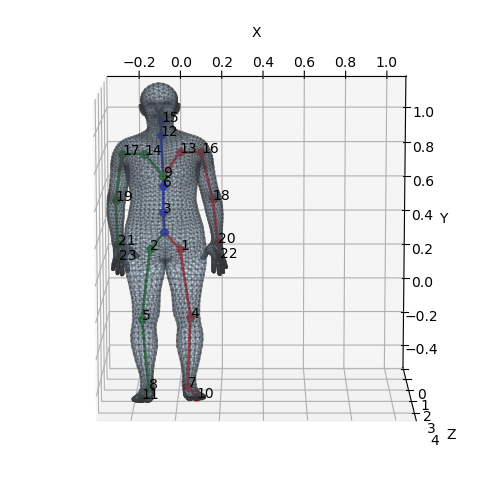

In [3]:
######For the whole video
poses = loaded_data['pose']  
betas = loaded_data['betas']  
trans = loaded_data["trans"]

print('Pose shape:', poses.shape)
print('Betas shape:', betas.shape)

smpl_layer = SMPL_Layer(
    center_idx=0,
    gender='neutral',
    model_root='smplpytorch/native/models'
)

# Use GPU if you have it
cuda = torch.cuda.is_available()
if cuda:
    smpl_layer.cuda()

os.makedirs('frames', exist_ok=True)

num_frames = poses.shape[0]

for i in range(num_frames):
    # Single frame pose & betas
    pose_params = torch.tensor(poses[i:i+1], dtype=torch.float32)
    shape_params = torch.tensor(betas[i:i+1], dtype=torch.float32)

    if cuda:
        pose_params = pose_params.cuda()
        shape_params = shape_params.cuda()

    with torch.no_grad():
        verts, Jtr = smpl_layer(pose_params, th_betas=shape_params)

    # Optional: flip Y axis for your coordinate system
    verts[:, :, 1] *= -1
    Jtr[:, :, 1] *= -1
    
    # add translation
    verts = verts + trans[:, None, :] 
    Jtr = Jtr + trans[:, None, :]

    # Save to disk
    savepath = f'frames/frame_{i:04d}.png'
    display_model(
        {'verts': verts.cpu(),
         'joints': Jtr.cpu()},
        model_faces=smpl_layer.th_faces,
        with_joints=True,
        kintree_table=smpl_layer.kintree_table,
        savepath=savepath,
        show=False
    )

    print(f'Saved: {savepath}')